In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [55]:
data = pd.read_csv('upload_DJIA_table.csv')
data

,Date,Open,High,Low,Close,Volume
0,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000
1,2016-06-30,17712.75977,17930.60938,17711.80078,17929.99023,133030000
2,2016-06-29,17456.01953,17704.50977,17456.01953,17694.67969,106380000
3,2016-06-28,17190.50977,17409.72070,17190.50977,17409.72070,112190000
4,2016-06-27,17355.21094,17355.21094,17063.08008,17140.24023,138740000
...,...,...,...,...,...,...
1984,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000
1985,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000
1986,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000
1987,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1989 non-null   object 
 1   Open    1989 non-null   float64
 2   High    1989 non-null   float64
 3   Low     1989 non-null   float64
 4   Close   1989 non-null   float64
 5   Volume  1989 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 93.4+ KB


In [57]:
data.drop(['Date'], axis= 1, inplace = True)

In [58]:
X = data.drop(['Close'], axis=1)
y = data['Close']
print(X)
print(y)


             Open         High          Low     Volume
0     17924.24023  18002.38086  17916.91016   82160000
1     17712.75977  17930.60938  17711.80078  133030000
2     17456.01953  17704.50977  17456.01953  106380000
3     17190.50977  17409.72070  17190.50977  112190000
4     17355.21094  17355.21094  17063.08008  138740000
...           ...          ...          ...        ...
1984  11532.07031  11718.28027  11450.88965  159790000
1985  11632.80957  11633.78027  11453.33984  182550000
1986  11781.70020  11782.34961  11601.51953  173590000
1987  11729.66992  11867.11035  11675.53027  183190000
1988  11432.08984  11759.95996  11388.04004  212830000

[1989 rows x 4 columns]
0       17949.36914
1       17929.99023
2       17694.67969
3       17409.72070
4       17140.24023
           ...     
1984    11615.92969
1985    11532.95996
1986    11642.46973
1987    11782.34961
1988    11734.32031
Name: Close, Length: 1989, dtype: float64


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
print(X_train)
print(y_train)

              Open          High           Low     Volume
894   13250.049810  13329.440430  13227.440430  127510000
591   16197.700200  16276.280270  16159.809570   97640000
180   17079.080080  17111.380860  16887.669920  120110000
465   17111.029300  17134.599610  17090.609380   61690000
413   17568.980470  17621.869140  17547.509770   71430000
...            ...           ...           ...        ...
411   17604.750000  17626.710940  17536.169920   75980000
457   17110.390630  17111.550780  16993.289060   69030000
1413  11010.490230  11199.690430  11010.339840  171770000
1865   8070.319824   8162.149902   7929.259766  345520000
741   15576.690430  15602.599610  15496.839840   99320000

[1591 rows x 4 columns]
894     13245.450200
591     16272.650390
180     16924.750000
465     17122.009770
413     17613.740230
            ...     
411     17612.199220
457     17013.869140
1413    11181.230470
1865     7956.660156
741     15542.240230
Name: Close, Length: 1591, dtype: float64


In [68]:
train_data= X_train.join(y_train)
train_data

,Open,High,Low,Volume,Close
894,13250.049810,13329.440430,13227.440430,127510000,13245.450200
591,16197.700200,16276.280270,16159.809570,97640000,16272.650390
180,17079.080080,17111.380860,16887.669920,120110000,16924.750000
465,17111.029300,17134.599610,17090.609380,61690000,17122.009770
413,17568.980470,17621.869140,17547.509770,71430000,17613.740230
...,...,...,...,...,...
411,17604.750000,17626.710940,17536.169920,75980000,17612.199220
457,17110.390630,17111.550780,16993.289060,69030000,17013.869140
1413,11010.490230,11199.690430,11010.339840,171770000,11181.230470
1865,8070.319824,8162.149902,7929.259766,345520000,7956.660156


In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 894 to 741
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1591 non-null   float64
 1   High    1591 non-null   float64
 2   Low     1591 non-null   float64
 3   Volume  1591 non-null   int64  
 4   Close   1591 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 139.1 KB


<AxesSubplot:>

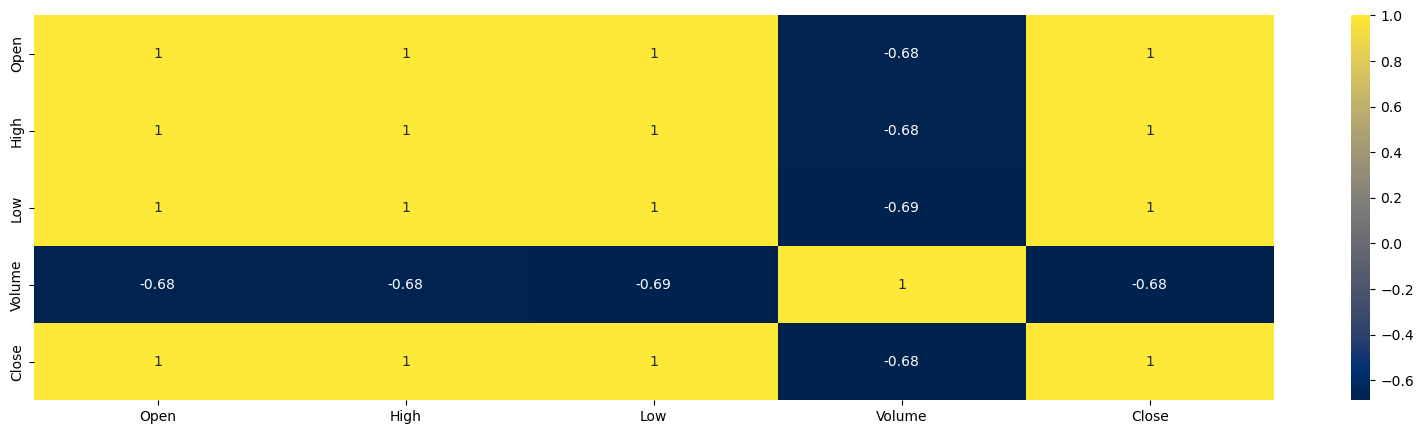

In [70]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.corr(), annot=True, cmap="cividis")

In [71]:
#-------------Linear_regression---------------- 
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

#rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print(np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(y_test, y_predict)
print("Accuracy of this model :", r2)

54.911374750697476
Accuracy of this model : 0.9997113339895053


In [72]:
#----------------SGD regression---------------------------------------------
SGD_reg = SGDRegressor(max_iter=100, tol=0.001,penalty=None,alpha=0.0001,n_iter_no_change=20)
SGD_reg.fit(X_train, y_train)
y_predict = SGD_reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(y_test, y_predict)
print("Accuracy of this model :", r2)

Accuracy of this model : -5.608792889287708e+43


C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [73]:
#------------------ridge--------------

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_predict = ridge.predict(X_test)
r2 = r2_score(y_test, y_predict)
print("Accuracy of this model :", r2)

Accuracy of this model : 0.9997113337837642


In [74]:
#------------------Lasso-------------

lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)
r2 = r2_score(y_test, y_predict)
print("Accuracy of this model :", r2)

Accuracy of this model : 0.999209299207386


C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.463e+06, tolerance: 1.549e+06
  model = cd_fast.enet_coordinate_descent(
